# <h1> 9-1 순차 데이터와 순환 신경망 </h1>

* 순차 데이터 (Sequential Data) : 텍스트나 시계열 데이터(Time Series Data)와 같이 순서에 의미가 있는 데이터.

* 피드포워드 신경망 (Feedforward Neural Network, FFNN) : 입력 데이터의 흐름이 앞으로만 전달되는 신경망. 완전 연결신경망, 합성곱 신경망이 모두 이에 해당.

* 순환 신경망 (Recurrent Neural Network, RNN) : 순차 데이터에 잘 맞는 인공 신경망의 한 종류. 순환층을 1개 이상 사용한 신경망을 순환 신경망이라고 부름

* 타입스텝 (Timestep) : 순환 신경망에서 샘플을 처리하는 한 단계

* 셀 (Cell) : 순환 신경망에서 특별히 층을 부르는 말

* 은닉 상태 (Hidden State) : 셀의 출력을 부르는 말

* 하이퍼볼릭 탄젠트 함수 (Hyperbolic Tangent) : 순환 신경망에서 활성화 함수로 많이 사용되는 함수. tanh 라고 표기하며, 우리말로는 쌍곡선 탄젠트 함수라고 불린다. -1에서 1사이의 범위를 가진다.
 
---

<h3> 순환 신경망 개념 설명 </h3>

---








In [ ]:
###########################################################################
#순차 데이터와 순환 신경망

#순차 데이터

#순환 신경망

#셀의 가중치와 입출력

#순환 신경망으로 순환 데이터 처리

**===================================================================================================**

# <h1> 9-2 순환 신경망으로 IMDB 리뷰 분류하기 </h1>

* 말뭉치 (Corpus) : 자연어 처리에 사용하는 텍스트 데이터의 모음, 즉 훈련 데이터셋을 말한다

* 토큰 (Token) : 영어 문장 텍스트에서 공백으로 구분되는 문자열. 분리하기 전 영어문장은 모두 소문자로 바뀌고 구둣점이 삭제되는 절차를 거친다
 
* 어휘사전 : 훈련세트에서 고유한 단어를 뽑아 만든 목록. 어휘사전에 없는 단어는 2라는 토큰으로 변환된다.

* 원-핫 인코딩 (One-Hot Encoding) : 특정 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터. 정수로 변환된 토큰을 원-핫 인코딩으로 변환하려면 어휘사전 크기의 벡터가 만들어진다.

* 단어 임베딩 (Word Embedding) : 정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환한다. 이러한 밀집 벡터는 단어 사이의 관계를 표현할 수 있기 때문에 자연어 처리에서 좋은 성능을 발휘한다.
---


<h3> IMDB 영화리뷰 감성분석 </h3>


* 넘파이, 맷플롯립, 사이킷런, 텐서플로

---

1. 텍스트 데이터의 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것이다. 부여된 정수는 단어의 의미나 크기와 전혀 관계가 없다.

2. 토큰에 할당하는 정수 중에 몇개는 특정한 용도로 예약되어 있다. 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰이다.






In [ ]:
###########################################################################
#순환 신경망으로 IMDB 리뷰 분류하기

#IMDB 리뷰 데이터셋 불러오기
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)    #imdb 데이터 불러오기. num_words = 500 : 어휘사전에는 500개의 단어만 들어가 있음

(25000,) (25000,)
218 189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]
239.00925 178.0


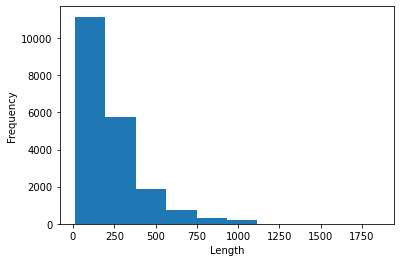

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
print(train_input.shape, test_input.shape)  #훈련세트/테스트세트 크기 확인. 각각 2만5천개의 샘플
#샘플의 배열이 1차원 -> IMDB 리뷰 텍스트는 길이가 제각각, 
#             -> 고정 크기의 2차원 배열에 담기 보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용

print(len(train_input[0]), len(train_input[1]))  #훈련세트의 1,2번째 샘플 : 218개, 189개의 토큰으로 이루어짐
print(train_input[0])         #훈련세트의 첫번째 샘플 출력, 이미 정수로 변환된 데이터 확인. 사전에 없는 단어는 2로 표시

print(train_target[:20])   #타깃 데이터 출력, 이진분류 문제임(부정(0)과 긍정(1)로 나누어짐)

from sklearn.model_selection import train_test_split  #검증세트 덜어내기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42)

#각 리뷰들의 길이를 확인해보자
import numpy as np
lengths = np.array([len(x) for x in train_input]) #길이 데이터 저장
print(np.mean(lengths), np.median(lengths))     #평균과 중위수 확인 : 239, 178 출력

#히스토그램으로 확인하여보자
from matplotlib import pyplot as plt
plt.hist(lengths)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()    #대부분의 리뷰 길이는 300자 미만임을 확인

from tensorflow.keras.preprocessing.sequence import pad_sequences 
train_seq = pad_sequences(train_input, maxlen = 100)  #리뷰들의 길이를 100에 맞추도록 패딩
#길이가 100보다 짧은 샘플들을 0으로 패딩한다

print(train_seq.shape)    #2만개의 샘플들의 길이가 모두 100으로 맞춰진것을 확인

print(train_seq[0])   #train_seq의 첫번째 샘플 확인
#샘플의 양 끝에 패딩값 0이 없음 -> 원래 100보다 긴 샘플
print(train_input[0][-10:]) #패딩 전 데이터와 비교 -> 마지막 10개의 토큰이 일치한다
#기본적으로 pad_sequences 함수는 maxlen 보다 긴 시퀀스의 앞부분을 자름. 
#뒷부분을 자르고 싶다면 truncating 매개변수를 "pre"가 아닌 "post"로 입력하기

print(train_seq[5])   #6번째 샘플 확인 : 앞부분에 0이 있는걸로 보아 원래 길이가 100이 안되었을 것
#기본적으로 패딩 토큰은 앞부분에 추가됨
#뒷부분에 추가하고 싶다면 padding 매개변수를 "pre"가 아닌 "post"로 입력하기

#뒷부분에 더 유용한 정보가 있을거라고 기대하기 때문

val_seq = pad_sequences(val_input, maxlen = 100)    #같은 방식으로 검증세트도 길이를 100으로 맞추자


In [ ]:
###########################################################################
#순환 신경망 만들기
from tensorflow import keras
model = keras.Sequential()  #모델 생성 

model.add(keras.layers.SimpleRNN(8, input_shape = (100,500))) #순환층 추가, 활성화함수는 기본값은 "tanh" 사용
#정숫값의 크기 속성을 없애고 고유하게 표현하기 위해 원-핫 인코딩 사용
#-> 어휘사전에 500개의 단어가 있으므로 샘플별 100개의 토큰을 원-핫 인코딩으로 표현하려면 배열의 길이가 500이어야 함

model.add(keras.layers.Dense(1, activation = "sigmoid"))  #출력층, 이진분류이므로 1개의 뉴런과 시그모이드 활성화함수

train_oh = keras.utils.to_categorical(train_seq)  #원-핫 인코딩된 배열로 변환해주는 to_categorcial() 함수
print(train_oh.shape)   #변환된 배열 크기 확인. (20000, 100, 500) 출력
val_oh = keras.utils.to_categorical(val_seq)    #검증세트도 변환

model.summary()   #모델의 구조 확인


(20000, 100, 500)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###########################################################################
#순환 신경망 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)  #RMSprop 옵티마이저의 학습률 0.0001로 지정

model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-simplernn-model.h5", save_best_only = True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
#체크포인트, 조기종료 콜백 사용

history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, earlystopping_cb])    #모델 훈련

#53번째 에포크에서 훈련 중단됨

Epoch 1/100
313/313 [==============================] - 27s 79ms/step - loss: 0.6998 - accuracy: 0.5010 - val_loss: 0.6971 - val_accuracy: 0.5178
Epoch 2/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6957 - accuracy: 0.5105 - val_loss: 0.6948 - val_accuracy: 0.5158
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6926 - accuracy: 0.5227 - val_loss: 0.6929 - val_accuracy: 0.5212
Epoch 4/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6900 - accuracy: 0.5346 - val_loss: 0.6912 - val_accuracy: 0.5306
Epoch 5/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6877 - accuracy: 0.5429 - val_loss: 0.6896 - val_accuracy: 0.5400
Epoch 6/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6856 - accuracy: 0.5526 - val_loss: 0.6881 - val_accuracy: 0.5442
Epoch 7/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6834 - accuracy: 0.5610 - val_loss: 0.6865 - val_ac

<코드 실행 결과>

Epoch 1/100
313/313 [==============================] - 27s 79ms/step - loss: 0.6998 - accuracy: 0.5010 - val_loss: 0.6971 - val_accuracy: 0.5178

Epoch 2/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6957 - accuracy: 0.5105 - val_loss: 0.6948 - val_accuracy: 0.5158

Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6926 - accuracy: 0.5227 - val_loss: 0.6929 - val_accuracy: 0.5212

...

Epoch 51/100
313/313 [==============================] - 16s 50ms/step - loss: 0.4162 - accuracy: 0.8183 - val_loss: 0.4673 - val_accuracy: 0.7814

Epoch 52/100
313/313 [==============================] - 15s 47ms/step - loss: 0.4154 - accuracy: 0.8201 - val_loss: 0.4723 - val_accuracy: 0.7796

Epoch 53/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4147 - accuracy: 0.8178 - val_loss: 0.4657 - val_accuracy: 0.7824

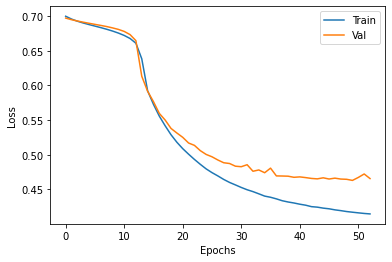

8000000 4000000000


In [ ]:
#훈련손실 곡선/검증손실 곡선을 그려보자

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()

#원-핫 인코딩의 단점 : 입력 데이터가 엄청 커진다.

<코드 실행 결과>

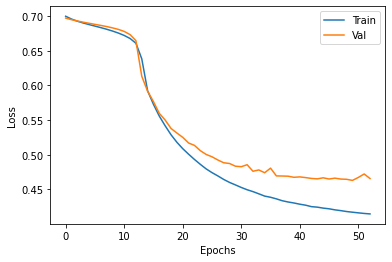

In [ ]:
###########################################################################
#단어 임베딩을 사용하기
#단어 임베딩 : 각 단어를 고정된 크기의 실수 벡터로 바꾸어줌. 순환 신경망에서 텍스트를 처리할때 자주 사용됨

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100)) #Embedding() 클래스로 임베딩 기능 사용
#첫번째 매개변수 500은 어휘사전의 크기, 두번째 매개변수 16은 임베딩 벡터의 크기를 나타냄
#input_length 매개변수는 입력 시퀀스의 길이를 나타냄 (샘플의 길이 100)
#단어 임베딩의 장점으로는 입력으로 정수데이터를 받는다는 것이다. (원-핫 인코딩으로 변경된 0,1 데이터 안써도 됨)

model2.add(keras.layers.SimpleRNN(8)) #순환층
model2.add(keras.layers.Dense(1, activation = "sigmoid")) #출력층
model2.summary()                      #모델 구조 확인


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#단어 임베딩을 사용한 모델을 훈련시켜보자
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-embedding-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6951 - accuracy: 0.5089 - val_loss: 0.6941 - val_accuracy: 0.5098
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6904 - accuracy: 0.5312 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6865 - accuracy: 0.5510 - val_loss: 0.6905 - val_accuracy: 0.5234
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6826 - accuracy: 0.5689 - val_loss: 0.6891 - val_accuracy: 0.5312
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6785 - accuracy: 0.5820 - val_loss: 0.6880 - val_accuracy: 0.5318
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6742 - accuracy: 0.5896 - val_loss: 0.6871 - val_accuracy: 0.5302
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6697 - accuracy: 0.5992 - val_loss: 0.6863 - val_accuracy

<코드 실행 결과>

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6951 - accuracy: 0.5089 - val_loss: 0.6941 - val_accuracy: 0.5098

Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6904 - accuracy: 0.5312 - val_loss: 0.6922 - val_accuracy: 0.5200

Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6865 - accuracy: 0.5510 - val_loss: 0.6905 - val_accuracy: 0.5234

...

Epoch 35/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5526 - accuracy: 0.7269 - val_loss: 0.6679 - val_accuracy: 0.6030

Epoch 36/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5493 - accuracy: 0.7283 - val_loss: 0.6679 - val_accuracy: 0.6058

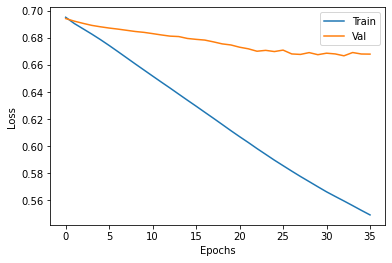

In [ ]:
#훈련손실 곡선/검증손실 곡선을 그려보자
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()
#검증 손실이 더 이상 감소되지 않아 훈련이 조기종료됨

###########################################################################
#케라스 API로 순환 신경망 구현

**===================================================================================================**

# <h1> 9-3 LSTM과 GRU 셀</h1>

* LSTM (Long Short-Term Memory) : 타입스텝이 긴 데이터를 효과적으로 학습하기 위해 고안된 순환층. 입력 게이트, 삭제 게이트, 출력 게이트 역할을 하는 작은 셀이 포함되어 있다

* GRU (Gated Recurrent Unit) : LSTM 셀의 간소화 버전으로 생각할 수 잇지만 LSTM 셀에 못지않는 성능을 냅니다
---


<h3> IMDB 영화리뷰 감성분석 </h3>


* 맷플롯립, 사이킷런, 텐서플로

---

1. LSTM은 은닉 상태 이외에 셀 상태를 출력한다. 셀 상태는 다음 층으로 전달되지 않으며 현재 셀에서만 순환됩니다.






In [1]:
###########################################################################
#LSTM과 GRU 셀

#LSTM 구조
##LSTM : 단기기억을 오래 기억하기 위해 고안됨

#LSTM 신경망 훈련하기
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)  #IMDB 데이터 불러오기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42)  #검증세트 덜어내기

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)    #시퀀스들의 길이 100으로 맞춰주기
val_seq = pad_sequences(val_input, maxlen = 100)


17473536/17464789 [==============================] - 0s 0us/step


In [2]:
#LSTM 셀을 사용한 순환층 만들기
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8)) #SimpleRNN 대신 LSTM 사용
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.summary()   #모델 구조 확인
#LSTM 셀에는 모델 파라미터가 800개. SimpleRNN의 200개보다 4개 증가 (LSTM에는 작은 셀들이 4개 있기 때문)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 컴파일과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-lstm-model.h5", save_best_only = True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 43ms/step - loss: 0.6925 - accuracy: 0.5289 - val_loss: 0.6914 - val_accuracy: 0.5648
Epoch 2/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6892 - accuracy: 0.6028 - val_loss: 0.6868 - val_accuracy: 0.6394
Epoch 3/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6807 - accuracy: 0.6611 - val_loss: 0.6724 - val_accuracy: 0.6870
Epoch 4/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6386 - accuracy: 0.7043 - val_loss: 0.5971 - val_accuracy: 0.7282
Epoch 5/100
313/313 [==============================] - 17s 56ms/step - loss: 0.5762 - accuracy: 0.7362 - val_loss: 0.5655 - val_accuracy: 0.7482
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5505 - accuracy: 0.7531 - val_loss: 0.5452 - val_accuracy: 0.7498
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5288 - accuracy: 0.7631 - val_loss: 0.5244 - val_ac

<코드 실행 결과>

Epoch 1/100
313/313 [==============================] - 17s 43ms/step - loss: 0.6925 - accuracy: 0.5289 - val_loss: 0.6914 - val_accuracy: 0.5648

Epoch 2/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6892 - accuracy: 0.6028 - val_loss: 0.6868 - val_accuracy: 0.6394

Epoch 3/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6807 - accuracy: 0.6611 - val_loss: 0.6724 - val_accuracy: 0.6870

...

Epoch 36/100
313/313 [==============================] - 13s 41ms/step - loss: 0.4031 - accuracy: 0.8206 - val_loss: 0.4309 - val_accuracy: 0.8036

Epoch 37/100
313/313 [==============================] - 13s 42ms/step - loss: 0.4020 - accuracy: 0.8209 - val_loss: 0.4300 - val_accuracy: 0.8036

Epoch 38/100
313/313 [==============================] - 13s 42ms/step - loss: 0.4013 - accuracy: 0.8215 - val_loss: 0.4304 - val_accuracy: 0.7992

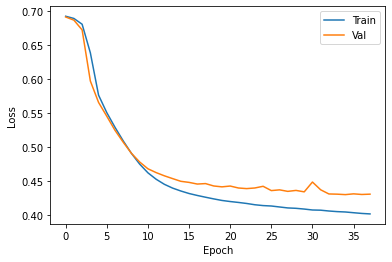

In [ ]:
#손실 그래프 그려서 확인
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()
#기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련 수행됨

In [ ]:
###########################################################################
#순환층에 드롭아웃 적용하기
#과대적합을 더 강하게 제어해보자

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))   #드롭아웃 비율 30%로 지정
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-dropout-model.h5", save_best_only = True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, earlystopping_cb])
#드롭아웃을 제외하고 나머지는 같은 조건으로 훈련 진행

Epoch 1/100
313/313 [==============================] - 19s 50ms/step - loss: 0.6922 - accuracy: 0.5436 - val_loss: 0.6912 - val_accuracy: 0.5702
Epoch 2/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6888 - accuracy: 0.6009 - val_loss: 0.6860 - val_accuracy: 0.6250
Epoch 3/100
313/313 [==============================] - 18s 56ms/step - loss: 0.6757 - accuracy: 0.6413 - val_loss: 0.6601 - val_accuracy: 0.6104
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6236 - accuracy: 0.7017 - val_loss: 0.6012 - val_accuracy: 0.7294
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5897 - accuracy: 0.7312 - val_loss: 0.5782 - val_accuracy: 0.7420
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5698 - accuracy: 0.7431 - val_loss: 0.5588 - val_accuracy: 0.7594
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5516 - accuracy: 0.7559 - val_loss: 0.5404 - val_ac

<코드 실행 결과>

Epoch 1/100
313/313 [==============================] - 19s 50ms/step - loss: 0.6922 - accuracy: 0.5436 - val_loss: 0.6912 - val_accuracy: 0.5702

Epoch 2/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6888 - accuracy: 0.6009 - val_loss: 0.6860 - val_accuracy: 0.6250

Epoch 3/100
313/313 [==============================] - 18s 56ms/step - loss: 0.6757 - accuracy: 0.6413 - val_loss: 0.6601 - val_accuracy: 0.6104

...

Epoch 47/100
313/313 [==============================] - 14s 43ms/step - loss: 0.4182 - accuracy: 0.8083 - val_loss: 0.4341 - val_accuracy: 0.8012

Epoch 48/100
313/313 [==============================] - 14s 43ms/step - loss: 0.4170 - accuracy: 0.8105 - val_loss: 0.4336 - val_accuracy: 0.8036

Epoch 49/100
313/313 [==============================] - 14s 44ms/step - loss: 0.4174 - accuracy: 0.8099 - val_loss: 0.4345 - val_accuracy: 0.8016

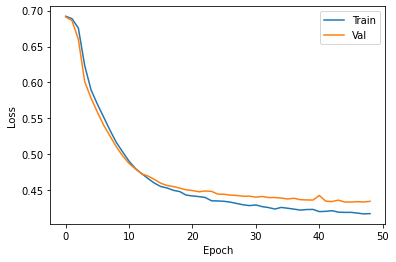

In [ ]:
#손실 그래프 그려서 확인

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()
#훈련 손실과 검증 손실 사이의 간격이 좁혀짐을 확인

In [3]:
###########################################################################
#2개의 층을 연결하기
#2개의 LSTM 층을 연결해보자
#마지막 순환층만 마지막 타임스텝의 은닉상태를 출력해야함 -> 첫 순환층은 모든 은닉상태 출력

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))  #첫 순환층은 모든 은닉상태 출력
model3.add(keras.layers.LSTM(8, dropout = 0.3))   #마지막 순환층은 마지막 타임스텝의 은닉상태만 출력함(기본값)
model3.add(keras.layers.Dense(1, activation = "sigmoid"))

model3.summary()  #구조 확인

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [4]:
#모델 훈련
#일반적으로 순환층을 쌓으면 성능이 높아진다
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-2rnn-model.h5", save_best_only = True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 38s 98ms/step - loss: 0.6927 - accuracy: 0.5157 - val_loss: 0.6920 - val_accuracy: 0.5186
Epoch 2/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6895 - accuracy: 0.5996 - val_loss: 0.6862 - val_accuracy: 0.6134
Epoch 3/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6710 - accuracy: 0.6549 - val_loss: 0.6444 - val_accuracy: 0.6568
Epoch 4/100
313/313 [==============================] - 25s 78ms/step - loss: 0.5880 - accuracy: 0.7079 - val_loss: 0.5532 - val_accuracy: 0.7254
Epoch 5/100
313/313 [==============================] - 25s 79ms/step - loss: 0.5420 - accuracy: 0.7358 - val_loss: 0.5302 - val_accuracy: 0.7396
Epoch 6/100
313/313 [==============================] - 25s 80ms/step - loss: 0.5177 - accuracy: 0.7529 - val_loss: 0.5141 - val_accuracy: 0.7554
Epoch 7/100
313/313 [==============================] - 25s 79ms/step - loss: 0.5025 - accuracy: 0.7638 - val_loss: 0.4921 - val_ac

<코드 실행 결과>

Epoch 1/100
313/313 [==============================] - 38s 98ms/step - loss: 0.6927 - accuracy: 0.5157 - val_loss: 0.6920 - val_accuracy: 0.5186

Epoch 2/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6895 - accuracy: 0.5996 - val_loss: 0.6862 - val_accuracy: 0.6134

Epoch 3/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6710 - accuracy: 0.6549 - val_loss: 0.6444 - val_accuracy: 0.6568

...

Epoch 31/100
313/313 [==============================] - 25s 79ms/step - loss: 0.4184 - accuracy: 0.8111 - val_loss: 0.4360 - val_accuracy: 0.7986

Epoch 32/100
313/313 [==============================] - 25s 81ms/step - loss: 0.4199 - accuracy: 0.8090 - val_loss: 0.4350 - val_accuracy: 0.8000

Epoch 33/100
313/313 [==============================] - 25s 78ms/step - loss: 0.4176 - accuracy: 0.8112 - val_loss: 0.4348 - val_accuracy: 0.8016

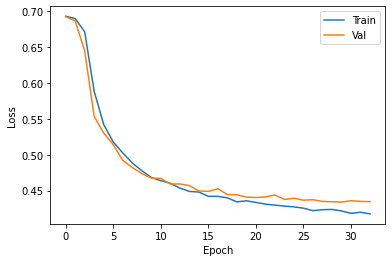

In [7]:
#손실 그래프 그려보기
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()
#과대적하을 제어하면서 손실을 최대한 낮춘 것으로 보임

In [15]:
###########################################################################
#GRU 구조 (Gated Recurrent Unit)
##LSTM을 간소화한 버전으로 생각할 수 있다

#GRU 신경망 훈련하기

##모델 만들기
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))     #GRU 층 사용
model4.add(keras.layers.Dense(1, activation = "sigmoid"))

model4.summary()    #구조 확인

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [16]:
#모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-gru-model.h5", save_best_only = True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 72ms/step - loss: 0.6921 - accuracy: 0.5416 - val_loss: 0.6913 - val_accuracy: 0.5538
Epoch 2/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6898 - accuracy: 0.5787 - val_loss: 0.6887 - val_accuracy: 0.5856
Epoch 3/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6863 - accuracy: 0.6092 - val_loss: 0.6849 - val_accuracy: 0.6020
Epoch 4/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6809 - accuracy: 0.6215 - val_loss: 0.6787 - val_accuracy: 0.6090
Epoch 5/100
313/313 [==============================] - 18s 58ms/step - loss: 0.6727 - accuracy: 0.6321 - val_loss: 0.6697 - val_accuracy: 0.6148
Epoch 6/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6605 - accuracy: 0.6427 - val_loss: 0.6566 - val_accuracy: 0.6278
Epoch 7/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6427 - accuracy: 0.6542 - val_loss: 0.6371 - val_ac

<코드 실행 결과>

Epoch 1/100
313/313 [==============================] - 25s 72ms/step - loss: 0.6921 - accuracy: 0.5416 - val_loss: 0.6913 - val_accuracy: 0.5538

Epoch 2/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6898 - accuracy: 0.5787 - val_loss: 0.6887 - val_accuracy: 0.5856

Epoch 3/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6863 - accuracy: 0.6092 - val_loss: 0.6849 - val_accuracy: 0.6020

...

Epoch 42/100
313/313 [==============================] - 14s 44ms/step - loss: 0.4056 - accuracy: 0.8203 - val_loss: 0.4331 - val_accuracy: 0.8030

Epoch 43/100
313/313 [==============================] - 14s 44ms/step - loss: 0.4049 - accuracy: 0.8192 - val_loss: 0.4357 - val_accuracy: 0.7972

Epoch 44/100
313/313 [==============================] - 14s 44ms/step - loss: 0.4044 - accuracy: 0.8198 - val_loss: 0.4337 - val_accuracy: 0.7984

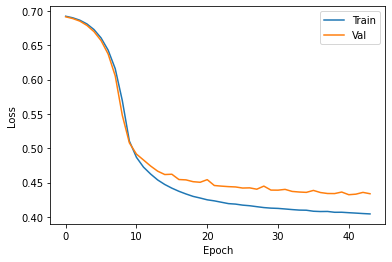

782/782 [==============================] - 12s 14ms/step - loss: 0.4284 - accuracy: 0.7993


[0.4284360110759735, 0.7992799878120422]

In [17]:
#손실 그래프 그리기

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()
#이전보다 훈련손실과 검증손실 사이에 차이는 있음(드롭아웃을 사용하지 않았기 때문)
#그러나 훈련과정이 잘 수렴되고 있는 것을 확인할 수 있음

###########################################################################
#LSTM과 GRU 셀로 훈련

#성능이 가장 좋았던 2개의 순환층을 쌓는 모델을 다시 로드하여 테스트 세트에 대한 성능을 확인해보자
test_seq = pad_sequences(test_input, maxlen = 100)
rnn_model = keras.models.load_model("best-2rnn-model.h5")
rnn_model.evaluate(test_seq, test_target)   
#테스트세트 손실과 정확도 [0.4284360110759735, 0.7992799878120422] 출력

**===================================================================================================**